In [ ]:
#Decision Tree Model
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset
df = pd.read_csv('/content/Crop_recommendation.csv')

X = df.drop('label', axis=1)
y = df['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy_dicisiontree = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy_dicisiontree:.5f}')


Accuracy: 0.98636


In [ ]:
#SVM Classifier
from sklearn.svm import SVC

svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)

# Training the model
svm_classifier.fit(X_train, y_train)

y_pred_svm = svm_classifier.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'SVM Accuracy: {accuracy_svm:.5f}')


SVM Accuracy: 0.97955


In [ ]:
#Random Forest model
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the model
rf_classifier.fit(X_train, y_train)

y_pred_rf = rf_classifier.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf:.5f}')


Random Forest Accuracy: 0.99318


In [ ]:
# Create a K-NN Classifier
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Training the model
knn_classifier.fit(X_train, y_train)

y_pred_knn = knn_classifier.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'K-NN Accuracy: {accuracy_knn:.5f}')


K-NN Accuracy: 0.97045


In [ ]:
# Naive Bayes model
from sklearn.naive_bayes import GaussianNB

naive_bayes_classifier = GaussianNB()

# Training the model
naive_bayes_classifier.fit(X_train, y_train)

y_pred_naive_bayes = naive_bayes_classifier.predict(X_test)

accuracy_naive_bayes = accuracy_score(y_test, y_pred_naive_bayes)
print(f'Naive Bayes Accuracy: {accuracy_naive_bayes:.5f}')


Naive Bayes Accuracy: 0.99545


In [ ]:
#Artificial Neural Network
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the dataset
df = pd.read_csv('/content/Crop_recommendation.csv')

# Encode categorical variables if any (e.g., 'label')
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

# Split the data into features (X) and labels (y)
X = df.drop('label', axis=1)
y = df['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize/Normalize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(len(set(y)), activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on the training data
model.fit(X_train, y_train, epochs=50, batch_size=64, verbose=1)

# Evaluate the model on the test data
_, accuracy_nn = model.evaluate(X_test, y_test)
print(f'Neural Network Accuracy: {accuracy_nn:.5f}')


Epoch 1/50
28/28 [==============================] - 2s 3ms/step - loss: 3.0116 - accuracy: 0.1222
Epoch 2/50
28/28 [==============================] - 0s 3ms/step - loss: 2.6681 - accuracy: 0.2932
Epoch 3/50
28/28 [==============================] - 0s 3ms/step - loss: 2.2306 - accuracy: 0.4699
Epoch 4/50
28/28 [==============================] - 0s 4ms/step - loss: 1.7370 - accuracy: 0.6347
Epoch 5/50
28/28 [==============================] - 0s 5ms/step - loss: 1.2803 - accuracy: 0.7437
Epoch 6/50
28/28 [==============================] - 0s 4ms/step - loss: 0.9370 - accuracy: 0.8199
Epoch 7/50
28/28 [==============================] - 0s 3ms/step - loss: 0.7126 - accuracy: 0.8676
Epoch 8/50
28/28 [==============================] - 0s 3ms/step - loss: 0.5654 - accuracy: 0.8955
Epoch 9/50
28/28 [==============================] - 0s 7ms/step - loss: 0.4631 - accuracy: 0.9097
Epoch 10/50
28/28 [==============================] - 0s 8ms/step - loss: 0.3892 - accuracy: 0.9250
Epoch 11/50
28/28 [

Decision Tree : Accuracy 98.63636363636363
Standard Vector Machine : Accuracy 97.95454545454545
Random Forest : Accuracy 99.31818181818181
KNN Classifier : Accuracy 97.04545454545455
Naive Bayes : Accuracy 99.54545454545455
Artificial Neural Networks : Accuracy 97.04545736312866



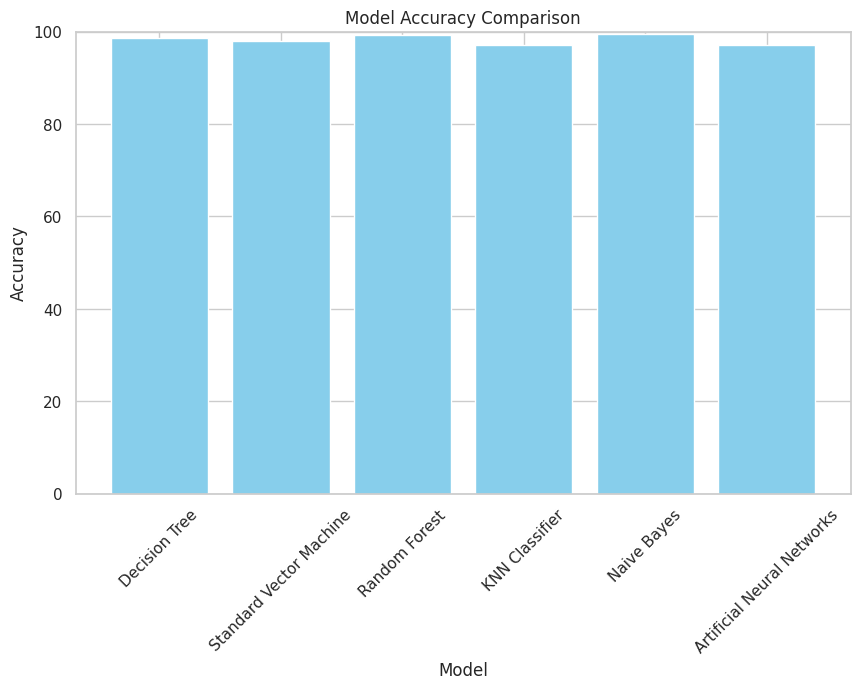

In [ ]:
accuracies = [accuracy_dicisiontree,accuracy_svm,accuracy_rf,accuracy_knn,accuracy_naive_bayes,accuracy_nn]
models = ["Decision Tree","Standard Vector Machine","Random Forest","KNN Classifier","Naive Bayes","Artificial Neural Networks"]

for i in range(len(accuracies)):
  accuracies[i]*=100

for i in range(len(accuracies)):
  print(models[i], ": Accuracy", accuracies[i])

print()
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim([0, 100])  # Set the y-axis range
plt.xticks(rotation=45)
plt.show()